In [1]:
import numpy as np
import pandas as pd
import random
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs, make_classification, make_moons, make_circles
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import plot_confusion_matrix
import time

In [2]:
data=pd.read_csv('data.csv')
data.shape

(40956, 49)

In [3]:
df_x = data[data.columns[0:-1]]
# print(df_x)
df_x = df_x.to_numpy()
# print(df_x)
scaler = preprocessing.MinMaxScaler()
df_x_norm = scaler.fit_transform(df_x)
# df_x_norm = normalize(df_x, norm='max')
# df_x_norm

In [4]:
df_y = data[data.columns[-1]]
df_y = df_y.to_numpy()
# df_y

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_x_norm, df_y, test_size=0.20)
#X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
#X_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)


In [6]:
y_test

array([ 4,  4,  2, ...,  4,  4, 11], dtype=int64)

In [46]:
def Accuracy(y_true,y_pred):
    count =0
    for i in range(0,y_pred.shape[0]):
        if y_true[i] == y_pred[i]:
                count+=1
    acc = count*100/y_pred.shape[0]
    return acc   

In [71]:
def Precision(y_true,y_pred):
    cm = ConfusionMatrix(y_true,y_pred)
#     print(cm[1])
    a = np.diagonal(cm)
#     print(a.shape)
    p =0
    for i in range(0,a.shape[0]):
        p += a[i]/np.sum(cm[i])
#     print(p)
    p = p/a.shape[0]
#     print(p)
    return p   

In [76]:
def Recall(y_true,y_pred):
    cm = ConfusionMatrix(y_true,y_pred)
    print(cm[:,1])
    a = np.diagonal(cm)
#     print(a.shape)
    p =0
    for i in range(0,a.shape[0]):
        p += a[i]/np.sum(cm[:,i])
#     print(p)
    p = p/a.shape[0]
#     print(p)
    return p   

In [9]:
def KNN(X_train,X_test,y_train,N):
    # A = np.tile(X_test,X_train[0])
    dists = -2* np.dot(X_test, X_train.T) + np.sum(X_train**2, axis = 1) + np.sum(X_test ** 2, axis = 1)[:, np.newaxis]
    #     inds = np.arape)
    print(dists)
    A = np.argsort(dists,axis =1)
#     k = 5
    A_ = A[:,:N]
    print(A_.shape)
    knn = y_train[A_]
    df = pd.DataFrame(knn)
    ypred = df.mode(axis=1, dropna=False)
    ypred_ = ypred.to_numpy()
    ypred_[:,0]
#     score = accuracy_score(y_test,ypred_[:,0])
#     score
# c = np.min(dists[0])
#A = np.sort(dists,axis =1)
    

In [70]:
def ConfusionMatrix(y_true,y_pred):
    ytrue = y_true - np.min(y_true)
    noC = len(np.unique(ytrue))
    A = ytrue * noC + y_pred
    hst = np.histogram(A, bins=121) #np.arange(0,noC**2)
#     print(hst[0])
#     print(len(hst[0]))
    return hst[0].reshape(noC, noC)

In [39]:
def SklearnSupervisedLearning(X_train,Y_train,X_test,y_test):
    #X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
    #X_test_i = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)
    start= time.time()
    clf = svm.SVC(gamma=0.7,C=1)
    clf.fit(X_train,Y_train)
    ypred = clf.predict(X_test)
    end = time.time()
    print(end-start)
    llf = LogisticRegression(solver='sag',multi_class = 'auto',max_iter=300)
    llf.fit(X_train,Y_train)
    ypred2 = llf.predict(X_test)
    start = time.time()
    ds1 = tree.DecisionTreeClassifier(max_features = "auto")
    ds1 = ds1.fit(X_train,Y_train)
    #tree.plot_tree(ds1.fit(X_train,Y_train))
#     ds = tree.DecisionTreeRegressor()
#     ds.fit(X_train,Y_train)
    ypred3 = ds1.predict(X_test)
    end = time.time()
    print(end-start)
    neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
    neigh.fit(X_train, Y_train)
    ypred4 = neigh.predict(X_test)
    
#     score = accuracy_score(y_test, ypred)
#     print(score)
    
#     for i in [ypred4,ypred3,ypred2,ypred]:
#         y_i = i
#         score = accuracy_score(y_test, y_i)
#         print(score)
    return ypred,ypred2,ypred3,ypred4

In [40]:
# SklearnSupervisedLearning(X_train,y_train,X_test,y_test)
a,b,c,d = SklearnSupervisedLearning(X_train,y_train,X_test,y_test)
print(a,b,c,d)


17.680271863937378
0.21346163749694824
[ 4  4  2 ...  4  4 11] [ 4  4  2 ...  4  4 11] [ 4  4  2 ...  4  4 11] [ 4  4  2 ...  4  4 11]


In [79]:
def SklearnVotingClassifier(X_train,Y_train,X_test,Y_test):
    models = []
    models.append(('LR',LogisticRegression(solver ='sag',multi_class ='auto',max_iter = 300)))
    models.append(('SVC', svm.SVC(gamma =0.7,probability= True,C=1)))
    models.append(('DTC', tree.DecisionTreeClassifier()))
    models.append(('KNN',KNeighborsClassifier(n_neighbors=5, weights='distance')))
#     vot_hard = VotingClassifier(estimators = models, voting ='hard') 
#     vot_hard.fit(X_train, Y_train) 
#     y_pred = vot_hard.predict(X_test)
#     print(y_pred)

#     # using accuracy_score metric to predict accuracy 
#     score = accuracy_score(Y_test, y_pred) 
#     print(score) 

# #     # Voting Classifier with soft voting 
    vot_soft = VotingClassifier(estimators = models, voting ='soft') 
    vot_soft.fit(X_train, Y_train) 
    y_pred1 = vot_soft.predict(X_test) 
    return y_pred1

    # using accuracy_score 
#     score = accuracy_score(Y_test, y_pred1) 
#     print(score)

In [80]:
y =SklearnVotingClassifier(X_train,y_train,X_test,y_test)
y

array([ 4,  4,  2, ...,  4,  4, 11], dtype=int64)

In [ ]:
def PCA(X_train,N):
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
#     X_test_std = sc.transform(X_test)
    Cov = np.cov(X_train_std.T)
    val, vec = np.linalg.eig(Cov)
    #print(val,vec)
    # eig_val_idx = np.argsort(val)
    # eig_val_idx = np.flip(eig_val_idx)
    # k = 3
    #s = 0
    # for i in range(len(val)):
    #     s += val[i]/ np.sum(val)
    #     if s> 0.8:
    #         print("true")
    #     else:
    #         print("false")    
    eigen_pairs = [(np.abs(val[i]), vec[:, i]) for i in range(len(val))]
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    t = []
    for i in range(0,N):
        t.append(eigen_pairs[i][1][:, np.newaxis])
    w = np.hstack(tuple(t))
#     w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))
    #     , eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]
#     print(w.shape)
    pca = np.dot(X_train_std,w)
#     print(pca)
    return pca

In [ ]:
# PCA(X_train,3)

In [ ]:
from sklearn.decomposition import PCA
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pc = PCA(n_components=3)
X_train_pca = pc.fit_transform(X_train_std)
X_train_pca

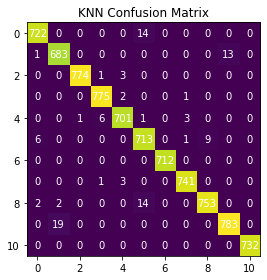

In [132]:
cm = ConfusionMatrix(y_test, d)
# plt.plot(cm)
# plt.matshow(cm)
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(0,11):
    for j in range(0,11):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_title("KNN Confusion Matrix")
fig.tight_layout()
plt.show()

In [ ]:
cm = ConfusionMatrix(y_test, c)
# plt.plot(cm)
# plt.matshow(cm)
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(0,11):
    for j in range(0,11):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Decision Tree Confusion Matrix")
fig.tight_layout()
plt.show()

In [ ]:
cm = ConfusionMatrix(y_test, b)
# plt.plot(cm)
# plt.matshow(cm)
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(0,11):
    for j in range(0,11):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Logistic Confusion Matrix")
fig.tight_layout()
plt.show()

In [ ]:
cm = ConfusionMatrix(y_test, a)
# plt.plot(cm)
# plt.matshow(cm)
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(0,11):
    for j in range(0,11):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_title("SVM Confusion Matrix")
fig.tight_layout()
plt.show()

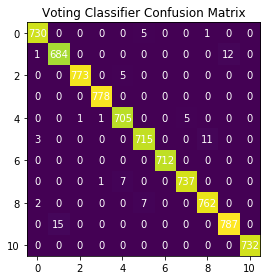

In [82]:
cm = ConfusionMatrix(y_test, y)
# plt.plot(cm)
# plt.matshow(cm)
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(0,11):
    for j in range(0,11):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Voting Classifier Confusion Matrix")
fig.tight_layout()
plt.show()

In [35]:
def Kmeans(X_train,N):
    m = X_train.shape[0]
    n = X_train.shape[1]
    iter = 100
    Centroids = []
#     np.array([]).reshape(n,0)
    for i in range(0,N):
        r= random.randint(0,m-1)
#         print(r)
        Centroids.append(X_train[r])
    Centroids = np.asarray(Centroids)
    clusters = {}
    flg = 0
    for n_iter in range(100):
        dists = -2* np.dot(Centroids, X_train.T) + np.sum(X_train**2, axis = 1) + np.sum(Centroids ** 2, axis = 1)[:, np.newaxis]
        C = np.argmin(dists,axis=0)
        s = {}
    #     x1,x2,x3,x4,x5 = ([] for i in range(N))
        for j in range(0,N):
            s[j]=[]
#         print(len(s))
        for i in range(0,m):
            s[C[i]].append(i)
    #     print(len(s[C[1]]))
        for i in range(N):
            Centroids[i] = np.mean(X_train[s[i]], axis = 0)
        
        if s == clusters:
#             print(n_iter)
            break
        
        clusters = s

    cluster_list = []
    for i in range(N):
        cluster_list.append(X_train[clusters[i]])
#     print(len(cluster_list))
#     print(cluster_list[1].shape)
    return cluster_list



In [84]:
clus = Kmeans(X_train,5)

In [108]:
def WCSS(Clusters):
    wss = 0
    for i in range(0,len(Clusters)):
        x = np.mean(Clusters[i],axis =0)
#         print(x.shape)
        dist = -2* np.dot(x, Clusters[i].T) + np.sum(Clusters[i]**2) + np.sum(x ** 2)
#         print(dist)
        wss += np.sum(dist)
#         print(wss)
    return wss

In [109]:
W = WCSS(clus)
W

3559847315.522564

In [120]:
model = svm.SVC(gamma=0.7,C=1)
param = {'C' : range(1,10)}
scoring = {'accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(model,param,cv =3)
gs.fit(X_train,y_train)
model2 = tree.DecisionTreeClassifier()
param2 = {'max_depth' : range(3,6)}
scoring = {'accuracy': make_scorer(accuracy_score)}
gs2 = GridSearchCV(model2,param2,cv =3)
gs2.fit(X_train,y_train)



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(3, 6)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

scores = [x[1] for x in gs.grid_scores_]
len(scores)

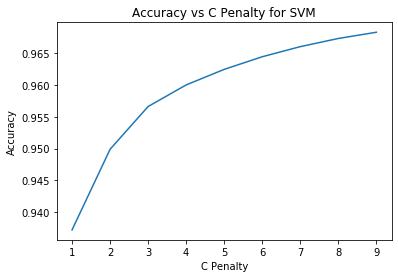

In [131]:
s =gs.cv_results_['mean_test_score']
# s1 = gs1.cv_results_['mean_test_score']
C = range(1,10)
# max_depth =range(3,6)
plt.plot(C,s)
plt.title("Accuracy vs C Penalty for SVM")
plt.xlabel("C Penalty")
plt.ylabel("Accuracy")
plt.show()

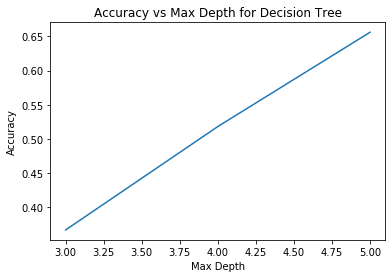

In [129]:
s1 = gs2.cv_results_['mean_test_score']
max_depth =range(3,6)
plt.plot(max_depth,s1)
plt.title("Accuracy vs Max Depth for Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In [125]:
model3 = KNeighborsClassifier(n_neighbors=5, weights='distance')
param3 = {'n_neighbors' : range(5,10)}
gs3 = GridSearchCV(model3,param3,cv =3)
gs3.fit(X_train,y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(5, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

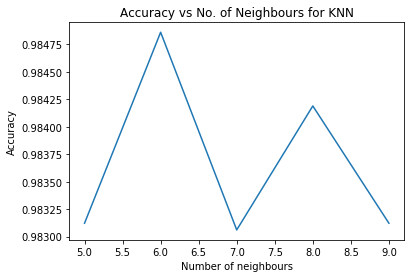

In [128]:
s2 = gs3.cv_results_['mean_test_score']
n_neighbors = range(5,10)
plt.plot(n_neighbors,s2)
plt.title("Accuracy vs No. of Neighbours for KNN")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.show()